# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | nasirabad
Processing Record 8 of Set 1 | luckau
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | huarmey
Processing Record 11 of Set 1 | sisimiut
Processing Record 12 of Set 1 | dudinka
Processing Record 13 of Set 1 | kavalerovo
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | klyuchi
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | zeya
Processing Record 21 of Set 1 | minas de marcona
Processing Record 22 of Set 1 | bikenibeu

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,49.64,52,0,6.91,US,1742367002
1,yellowknife,62.4560,-114.3525,-5.28,71,40,6.91,CA,1742367004
2,bredasdorp,-34.5322,20.0403,72.63,61,0,5.48,ZA,1742367005
3,waitangi,-43.9535,-176.5597,63.82,94,37,3.00,NZ,1742367006
4,college,64.8569,-147.8028,14.07,63,75,10.36,US,1742367007


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,49.64,52,0,6.91,US,1742367002
1,yellowknife,62.4560,-114.3525,-5.28,71,40,6.91,CA,1742367004
2,bredasdorp,-34.5322,20.0403,72.63,61,0,5.48,ZA,1742367005
3,waitangi,-43.9535,-176.5597,63.82,94,37,3.00,NZ,1742367006
4,college,64.8569,-147.8028,14.07,63,75,10.36,US,1742367007


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

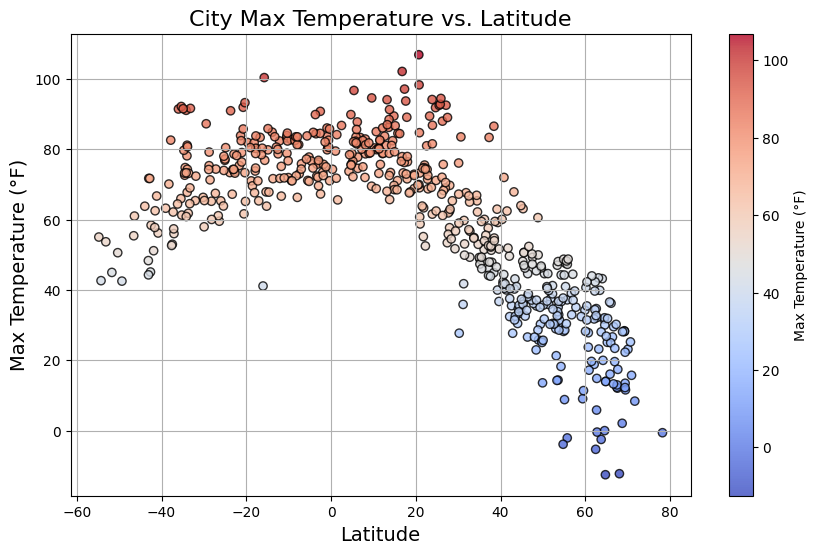

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], 
            c=city_data_df["Max Temp"], cmap="coolwarm", edgecolor="black", 
            linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (°F)", fontsize=14)
plt.grid(True)
plt.colorbar(label="Max Temperature (°F)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

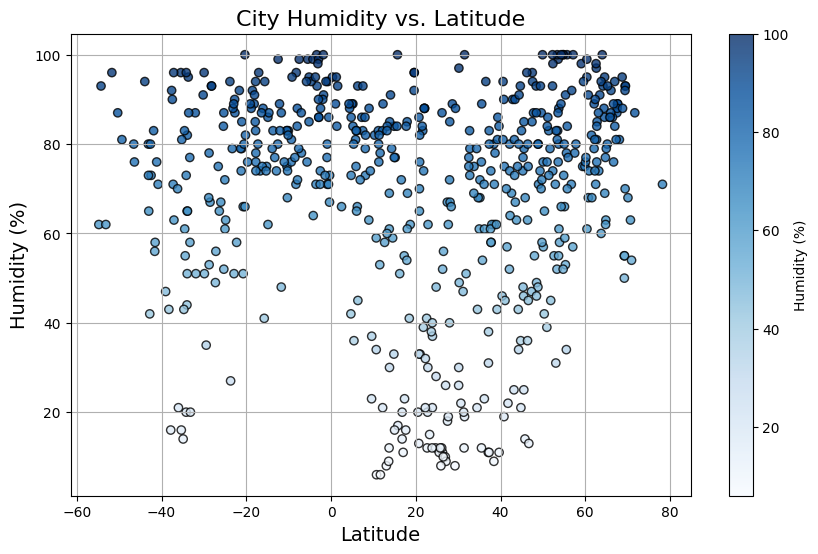

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], 
            c=city_data_df["Humidity"], cmap="Blues", edgecolor="black", 
            linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.grid(True)
plt.colorbar(label="Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

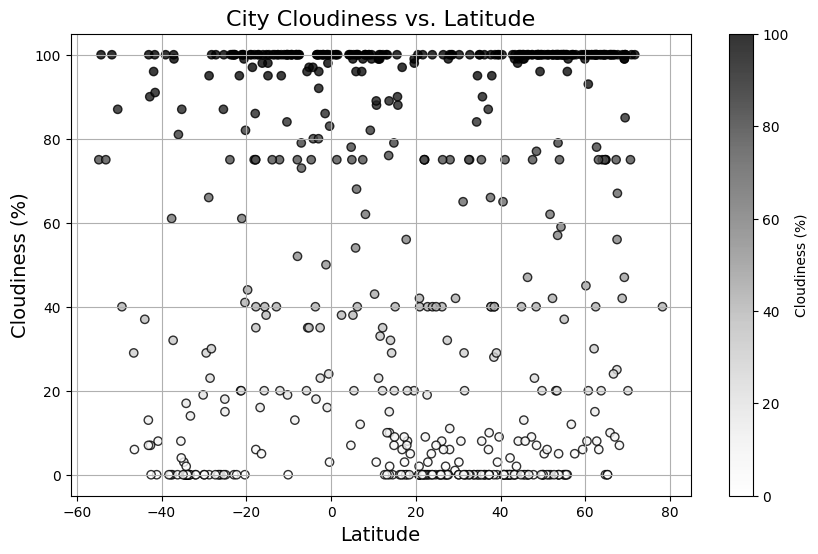

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], 
            c=city_data_df["Cloudiness"], cmap="Greys", edgecolor="black", 
            linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.grid(True)
plt.colorbar(label="Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

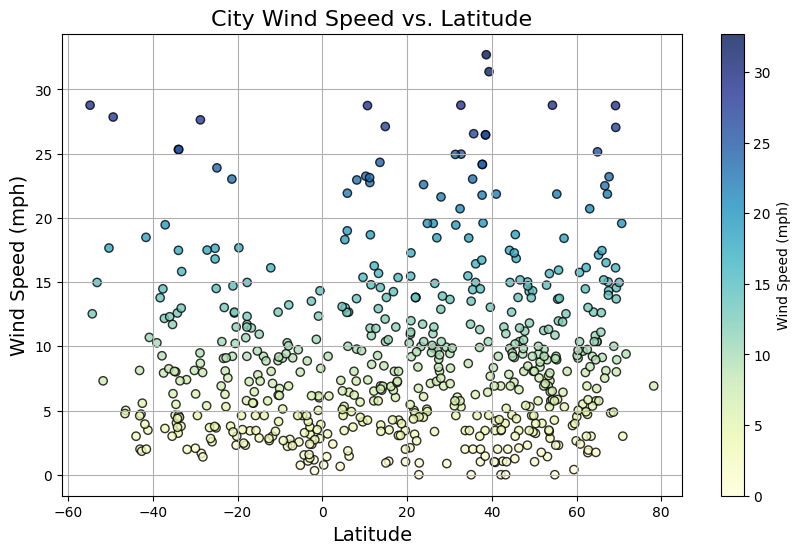

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], 
            c=city_data_df["Wind Speed"], cmap="YlGnBu", edgecolor="black", 
            linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.grid(True)
plt.colorbar(label="Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, title, x_label, y_label, line_eq=True):
    """
    Create a linear regression plot for the provided data.
    
    Args:
        x_values: Independent variable values
        y_values: Dependent variable values
        title: Plot title
        x_label: Label for x-axis
        y_label: Label for y-axis
        line_eq: Boolean to display the linear equation
    """
# Run linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line
    x = np.array(x_values)
    y_regression = slope * x + intercept
    
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x, y_regression, "r-")
    
    # Add plot details
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.grid(True)
    
    # Add regression equation
    if line_eq:
        equation = f"y = {slope:.2f}x + {intercept:.2f}"
        r_squared = f"R² = {r_value**2:.2f}"
        plt.annotate(equation + "\n" + r_squared, 
                     xy=(0.05, 0.95), xycoords="axes fraction",
                     fontsize=14, ha="left", va="top")
    
    return slope, intercept, r_value**2


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,49.64,52,0,6.91,US,1742367002
1,yellowknife,62.4560,-114.3525,-5.28,71,40,6.91,CA,1742367004
4,college,64.8569,-147.8028,14.07,63,75,10.36,US,1742367007
6,nasirabad,26.3000,74.7333,88.00,11,0,9.86,IN,1742367010
7,luckau,51.8500,13.7167,37.60,45,0,4.00,DE,1742367011


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,72.63,61,0,5.48,ZA,1742367005
3,waitangi,-43.9535,-176.5597,63.82,94,37,3.00,NZ,1742367006
5,kruisfontein,-34.0033,24.7314,78.15,44,0,3.24,ZA,1742367009
8,grytviken,-54.2811,-36.5092,42.66,93,100,12.53,GS,1742367012
9,huarmey,-10.0681,-78.1522,71.96,83,100,6.71,PE,1742367013


###  Temperature vs. Latitude Linear Regression Plot

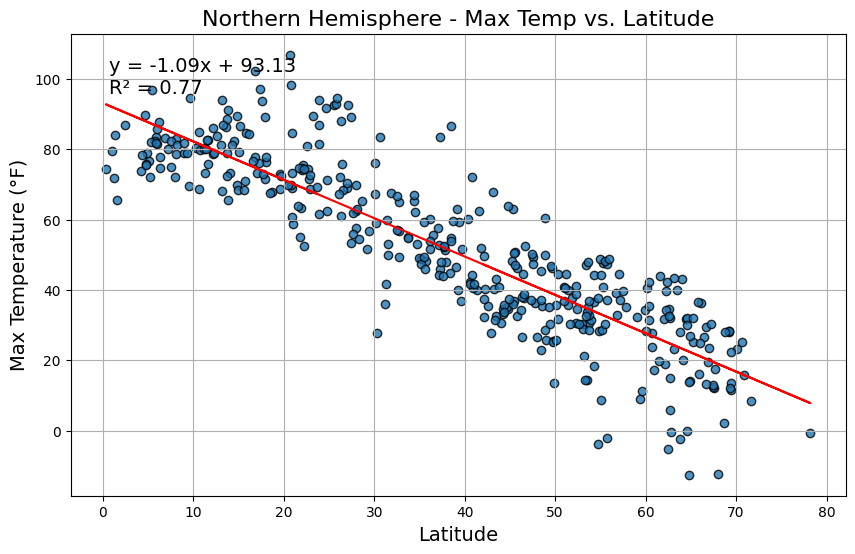

In [15]:
# Linear regression on Northern Hemisphere
n_temp_slope, n_temp_int, n_temp_r2 = linear_regression_plot(
    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
    "Northern Hemisphere - Max Temp vs. Latitude",
    "Latitude", "Max Temperature (°F)"
)

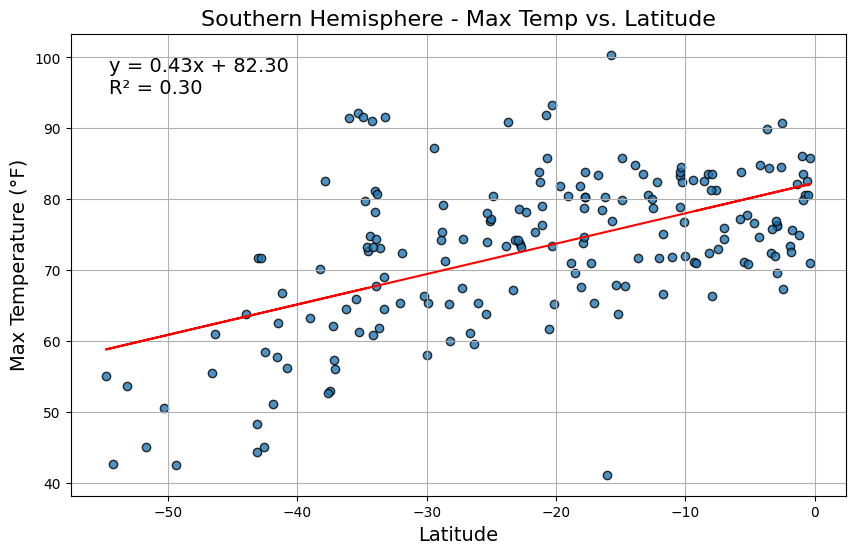

In [16]:
# Linear regression on Southern Hemisphere
s_temp_slope, s_temp_int, s_temp_r2 = linear_regression_plot(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
    "Southern Hemisphere - Max Temp vs. Latitude",
    "Latitude", "Max Temperature (°F)"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

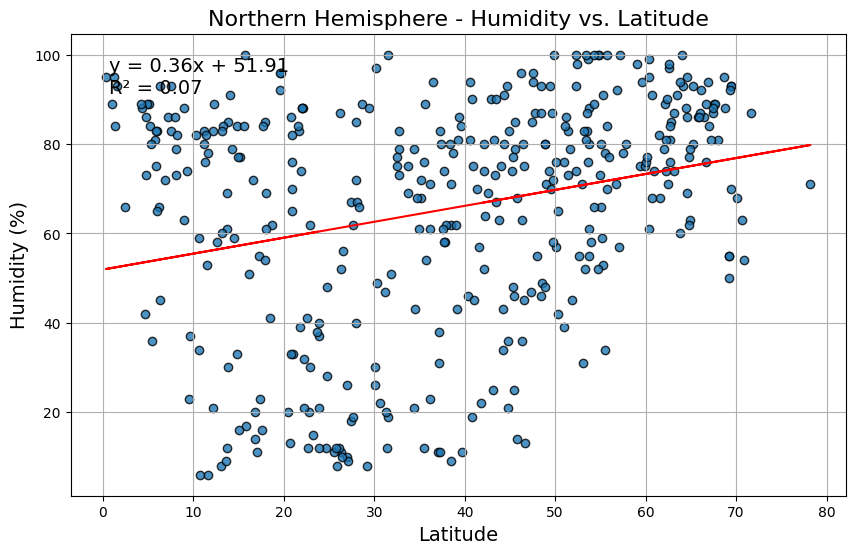

In [17]:
# Northern Hemisphere
n_humidity_slope, n_humidity_int, n_humidity_r2 = linear_regression_plot(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
    "Northern Hemisphere - Humidity vs. Latitude",
    "Latitude", "Humidity (%)"
)

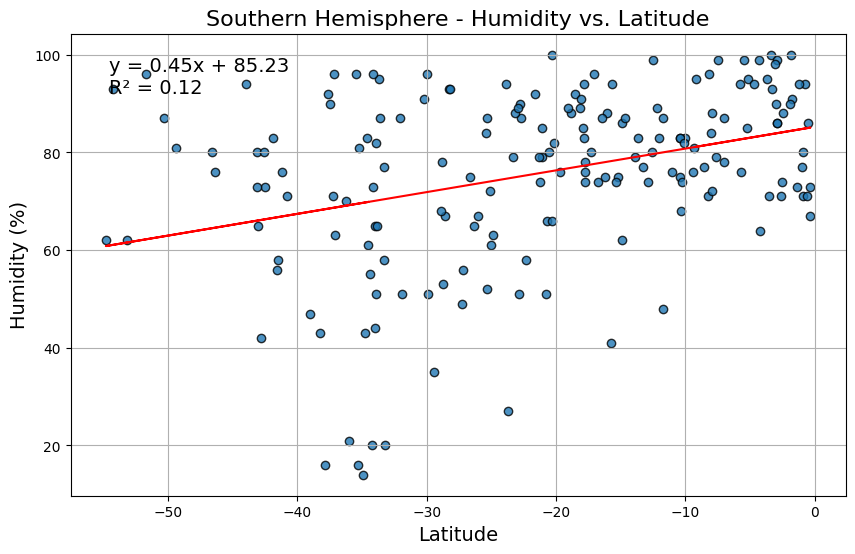

In [18]:
# Southern Hemisphere
s_humidity_slope, s_humidity_int, s_humidity_r2 = linear_regression_plot(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
    "Southern Hemisphere - Humidity vs. Latitude",
    "Latitude", "Humidity (%)"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

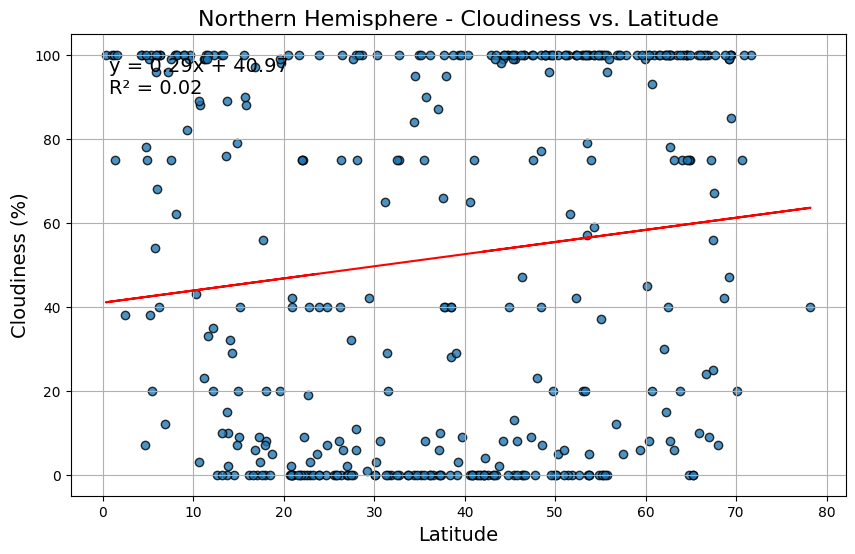

In [19]:
# Northern Hemisphere
n_clouds_slope, n_clouds_int, n_clouds_r2 = linear_regression_plot(
    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
    "Northern Hemisphere - Cloudiness vs. Latitude",
    "Latitude", "Cloudiness (%)"
)

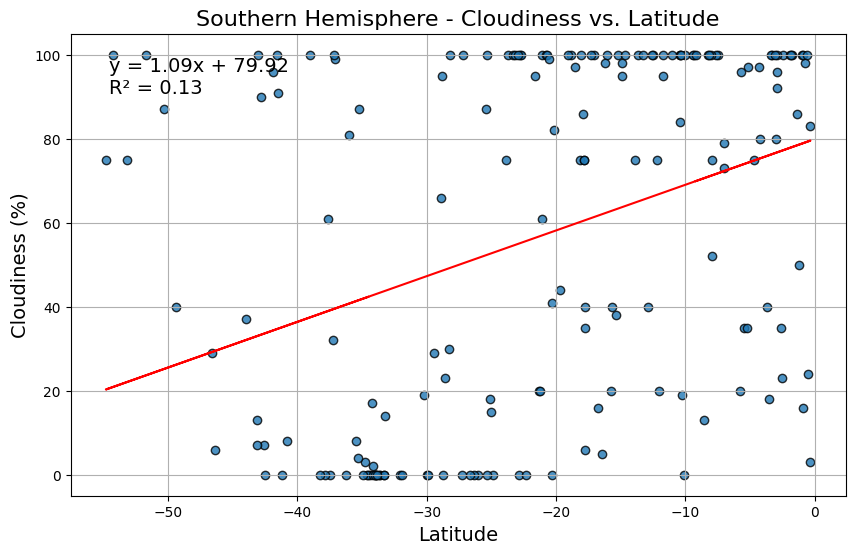

In [20]:
# Southern Hemisphere
s_clouds_slope, s_clouds_int, s_clouds_r2 = linear_regression_plot(
    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
    "Southern Hemisphere - Cloudiness vs. Latitude",
    "Latitude", "Cloudiness (%)"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

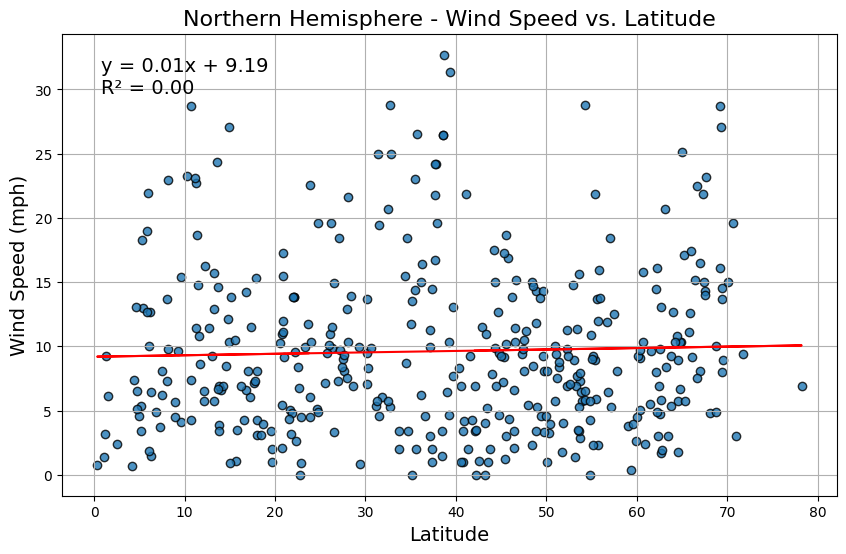

In [21]:
# Northern Hemisphere
n_wind_slope, n_wind_int, n_wind_r2 = linear_regression_plot(
    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
    "Northern Hemisphere - Wind Speed vs. Latitude",
    "Latitude", "Wind Speed (mph)"
)

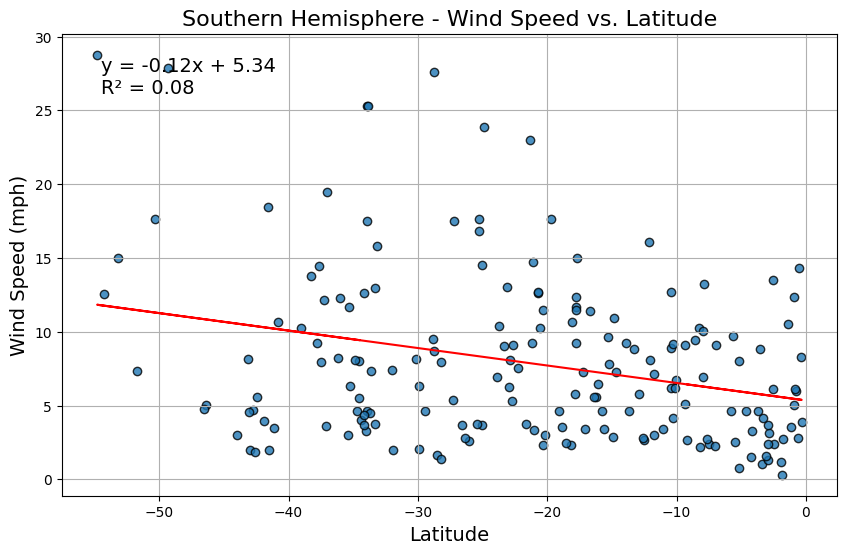

In [22]:
# Southern Hemisphere
s_wind_slope, s_wind_int, s_wind_r2 = linear_regression_plot(
    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
    "Southern Hemisphere - Wind Speed vs. Latitude",
    "Latitude", "Wind Speed (mph)"
)

**Discussion about the linear relationship:** 
	1.	Temperature vs. Latitude:
	•	In the Northern Hemisphere, there is a strong negative correlation between temperature and latitude, meaning temperatures decrease as you move away from the equator.
	•	In the Southern Hemisphere, there is a positive correlation between latitude and temperature, where temperatures increase as latitude moves toward the equator.
	•	The Northern Hemisphere shows a stronger relationship, likely due to more land mass compared to the Southern Hemisphere’s larger oceans.
	2.	Humidity vs. Latitude:
	•	Both hemispheres show weak correlations between humidity and latitude, suggesting that factors like proximity to oceans, local climates, and seasonal variations play a more significant role than latitude alone.
	3.	Cloudiness vs. Latitude:
	•	Both hemispheres show very weak correlations between latitude and cloudiness, indicating that cloud formation is influenced by a variety of factors beyond latitude, such as atmospheric conditions and regional climate patterns.
	4.	Wind Speed vs. Latitude:
	•	Both hemispheres show weak correlations between latitude and wind speed, suggesting that wind speed is primarily influenced by factors such as pressure gradients, geography, and atmospheric circulation rather than latitude.

In summary, while latitude significantly affects temperature, the relationships between latitude and other factors like humidity, cloudiness, and wind speed are weak and influenced by more complex, localized factors.